# Monte Carlo simulator
By: Magnus Kvåle Helliesen

# *Under construction*

In [54]:
import pandas as pd
import numpy as np
from numpy.linalg import eig, inv
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

Suppose we have a matrix of data $X=\{x_t\}_{t=0}^{T-1}$, where $x_t=\{x_{i, t}\}_{i=1}^n$ is a vector of variabels at time $t$.

In [55]:
# Class to be built
class MonteCarlo():
    def __init__(self, df: pd.DataFrame):
        self._df = df

    @property
    def df(self):
        return self._df

    def _find_eig(self):
        array = self.df.to_numpy()

In [56]:
# Function that fetches data
def fetch_data(tickers: tuple):
    data = {}
    for ticker in tickers:
        data[ticker] = yf.Ticker(ticker).history(period='max')

    # Returning transformed data
    return (
        pd.concat(data)[['Close']]
        .reset_index()
        .rename(columns={'level_0': 'Ticker'})
        .pivot(index='Date', columns='Ticker', values='Close')
    )

tickers = ('NHY.OL', 'DNB.OL', 'YAR.OL', 'NAS.OL', 'TEL.OL')
df = fetch_data(tickers).dropna()
df

Ticker,DNB.OL,NAS.OL,NHY.OL,TEL.OL,YAR.OL
Date,,,,,
2004-03-25 00:00:00+01:00,17.060760,1216.948120,10.377869,18.962240,22.093431
2004-03-26 00:00:00+01:00,17.216925,1199.807983,10.389772,19.238770,22.526636
2004-03-29 00:00:00+02:00,17.255964,1216.948120,10.330262,19.712824,21.985134
2004-03-30 00:00:00+02:00,17.177881,1222.661499,10.246956,18.646193,21.660233
2004-03-31 00:00:00+02:00,17.568291,1199.807983,10.282660,18.804213,21.573587
...,...,...,...,...,...
2023-10-18 00:00:00+02:00,223.300003,8.176000,60.500000,111.150002,387.899994
2023-10-19 00:00:00+02:00,207.600006,8.216000,59.320000,115.400002,386.000000
2023-10-20 00:00:00+02:00,206.000000,7.920000,58.020000,115.750000,361.600006


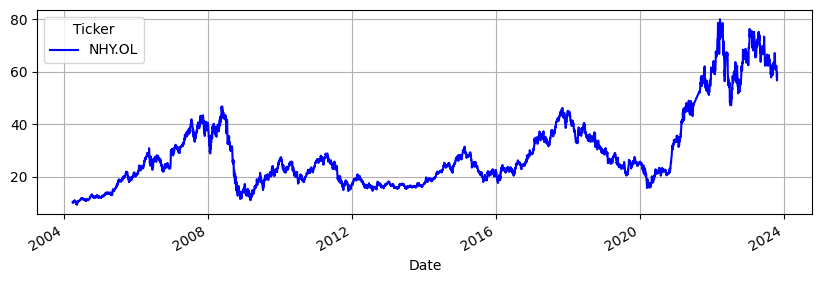

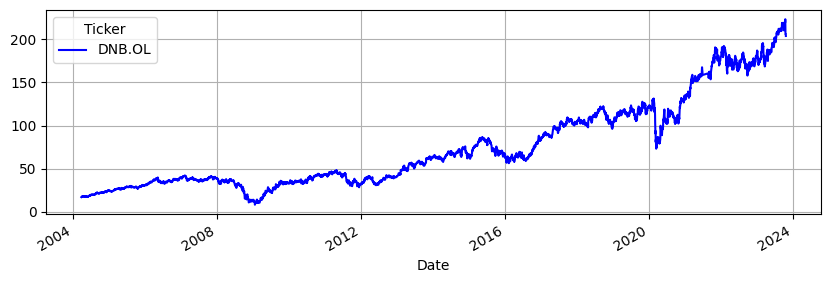

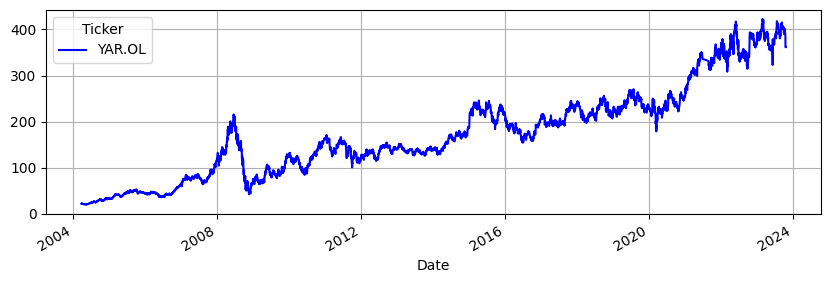

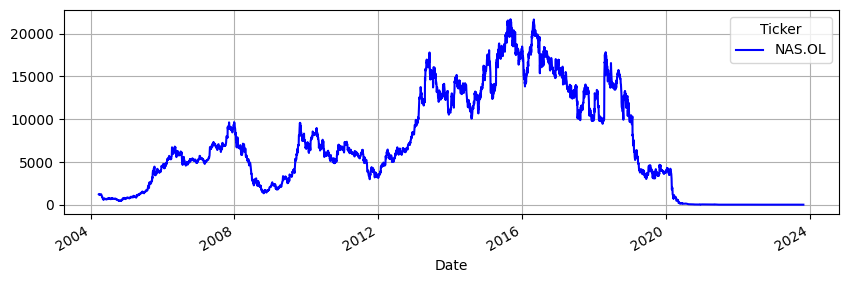

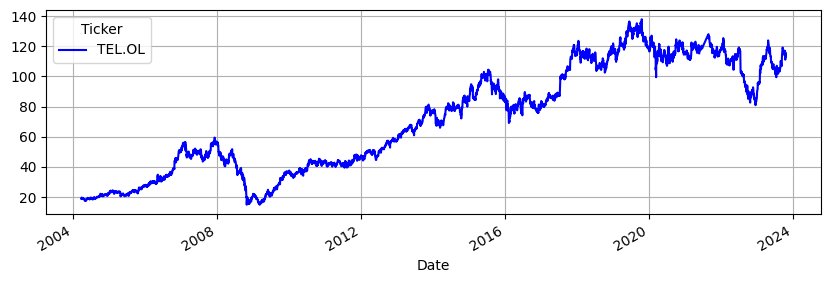

In [57]:
for ticker in tickers:
    df[[ticker]].plot(color='b', figsize=(10, 3), grid=True)

In [58]:
# Calculating log-differences and removing first value
df_diff = np.log(df).diff().iloc[1:, :]
df_diff

Ticker,DNB.OL,NAS.OL,NHY.OL,TEL.OL,YAR.OL
Date,,,,,
2004-03-26 00:00:00+01:00,0.009112,-0.014185,0.001146,0.014478,0.019418
2004-03-29 00:00:00+02:00,0.002265,0.014185,-0.005744,0.024342,-0.024332
2004-03-30 00:00:00+02:00,-0.004535,0.004684,-0.008097,-0.055627,-0.014889
2004-03-31 00:00:00+02:00,0.022473,-0.018869,0.003478,0.008439,-0.004008
2004-04-01 00:00:00+02:00,-0.011174,-0.014389,-0.005804,-0.004211,0.004008
...,...,...,...,...,...
2023-10-18 00:00:00+02:00,0.016708,-0.038863,-0.018343,-0.041946,-0.010514
2023-10-19 00:00:00+02:00,-0.072903,0.004880,-0.019697,0.037524,-0.004910
2023-10-20 00:00:00+02:00,-0.007737,-0.036692,-0.022159,0.003028,-0.065299


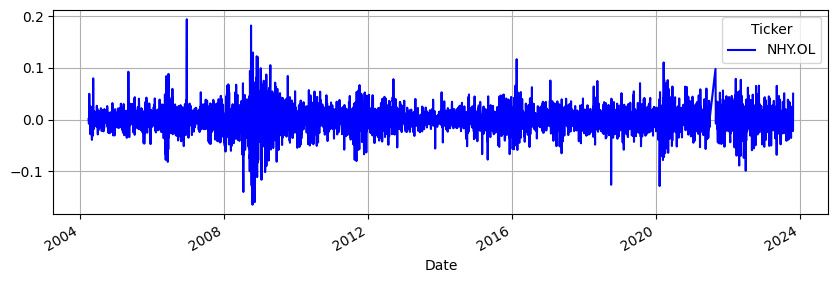

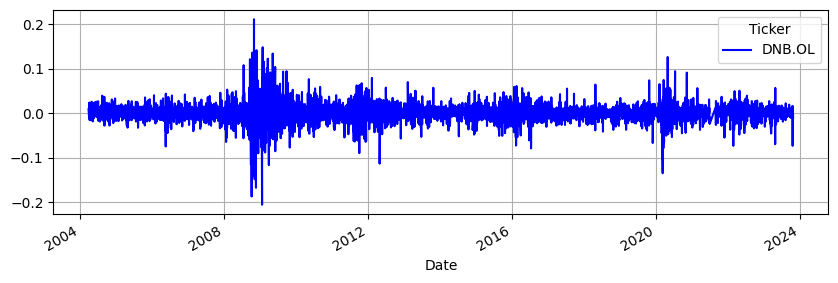

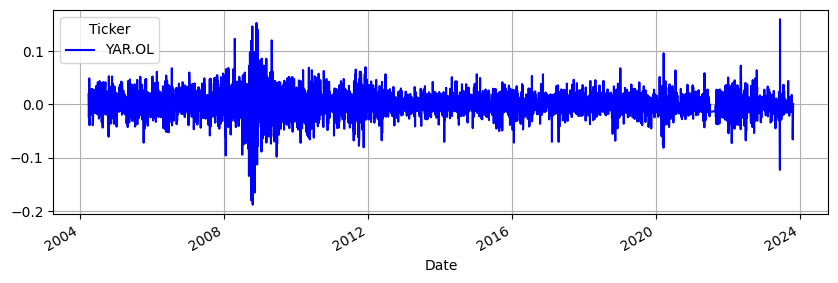

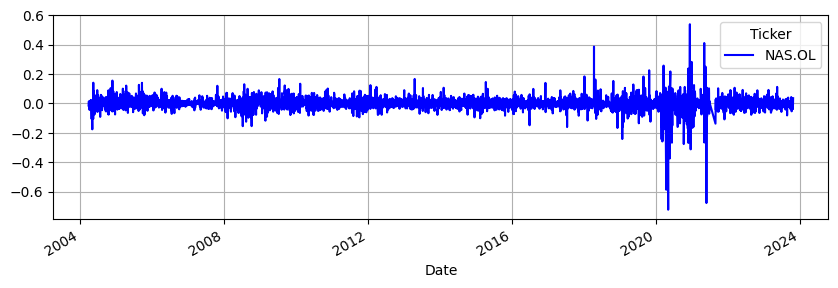

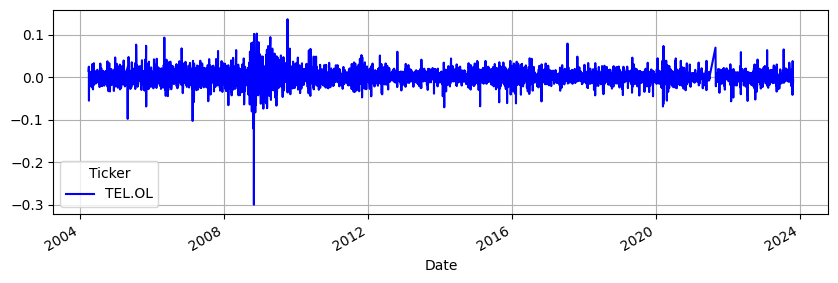

In [59]:
for ticker in tickers:
    df_diff[[ticker]].plot(color='b', figsize=(10, 3), grid=True)

In [67]:
df_diff.corr().style.background_gradient(cmap='Blues')

Ticker,DNB.OL,NAS.OL,NHY.OL,TEL.OL,YAR.OL
Ticker,,,,,
DNB.OL,1.000000,0.194796,0.482696,0.389010,0.418200
NAS.OL,0.194796,1.000000,0.204178,0.153131,0.167189
NHY.OL,0.482696,0.204178,1.000000,0.353464,0.487625
TEL.OL,0.389010,0.153131,0.353464,1.000000,0.346942
YAR.OL,0.418200,0.167189,0.487625,0.346942,1.000000


In [61]:
models = {}
for ticker in tickers:
    models[ticker] = arch_model(df_diff[[ticker]], vol='garch', p=1, o=0, q=1, rescale=False)

In [62]:
fits = {key: val.fit() for key, val in models.items()}

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1755897796.2864788
Iteration:      2,   Func. Count:     18,   Neg. LLF: 58066292495391.81
Iteration:      3,   Func. Count:     32,   Neg. LLF: 3812541.193101361
Iteration:      4,   Func. Count:     45,   Neg. LLF: 35109912439708.824
Iteration:      5,   Func. Count:     59,   Neg. LLF: -11868.647691789793
Optimization terminated successfully    (Exit mode 0)
            Current function value: -11868.647720665778
            Iterations: 9
            Function evaluations: 59
            Gradient evaluations: 5


Iteration:      1,   Func. Count:      6,   Neg. LLF: 6.668684734964113e+20
Iteration:      2,   Func. Count:     18,   Neg. LLF: -12972.983489364042
Optimization terminated successfully    (Exit mode 0)
            Current function value: -12972.983502104757
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 97781199.63856813
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1.4159680922748593e+18
Iteration:      3,   Func. Count:     30,   Neg. LLF: 12246640599419.707
Iteration:      4,   Func. Count:     45,   Neg. LLF: 11092263.27271216
Iteration:      5,   Func. Count:     57,   Neg. LLF: -12211.265216638203
Optimization terminated successfully    (Exit mode 0)
            Current function value: -12211.265259650052
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.98767293

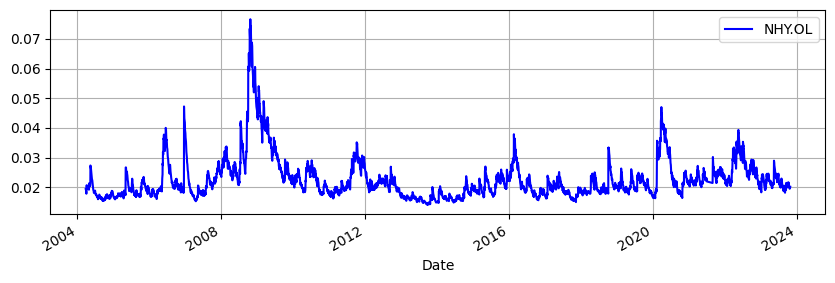

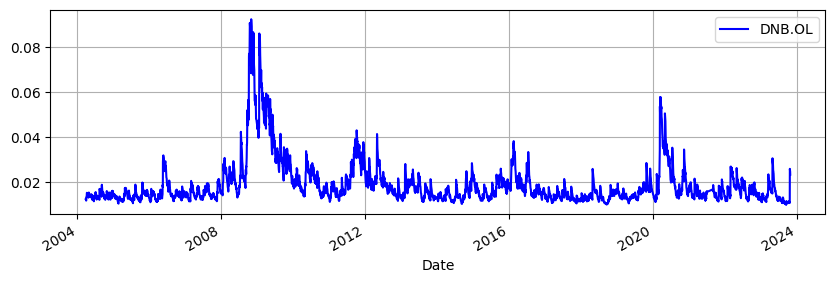

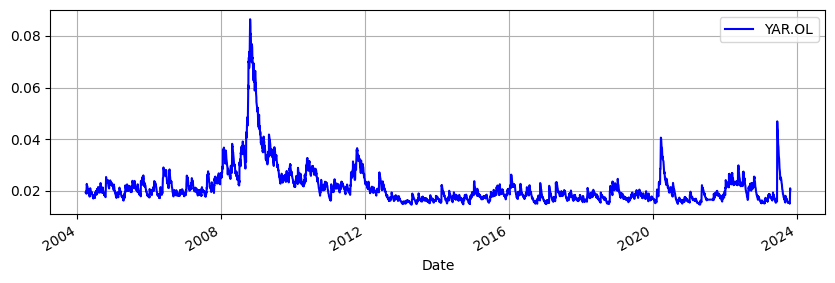

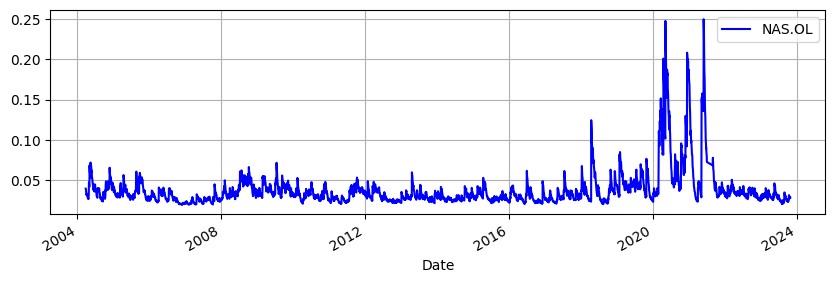

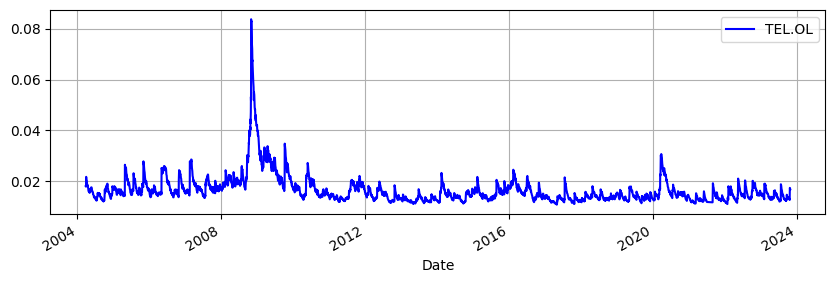

In [63]:
for ticker in tickers:
    pd.DataFrame({ticker: fits[ticker].conditional_volatility}).plot(color='b', figsize=(10, 3), grid=True)